In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [21]:
fruits = pd.DataFrame({"fruits":["apple","banana"], "weight": [20, 15], "colour": ["red", "yellow"]})
fruits.head()

,fruits,weight,colour
0,apple,20,red
1,banana,15,yellow


In [22]:
fruits.set_index("fruits")

,weight,colour
fruits,,
apple,20,red
banana,15,yellow


## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [4]:
airbnb = pd.read_csv("Datasets/AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


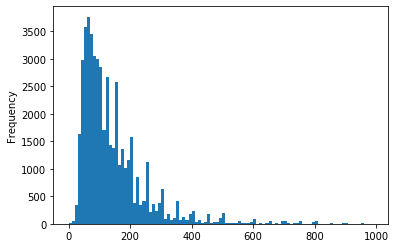

In [7]:
airbnb["price"].plot.hist(bins = range(0,1000,10))
plt.show()

## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [9]:
airbnb["max income"] = airbnb["price"]*airbnb["availability_365"]
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,max income
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,79875
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,54750
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000. Then make a scatter plot of yearly income versus number of reviews 

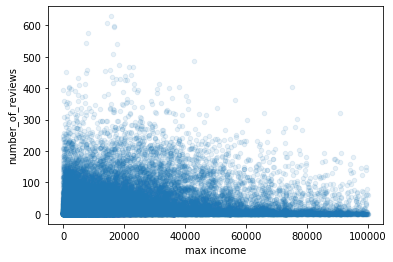

In [17]:
airbnb2 = airbnb[(airbnb["max income"]>=1) & (airbnb["max income"]<=100000)].copy()
airbnb2.plot(x = "max income", y = "number_of_reviews", kind = "scatter", alpha=0.1)
plt.show()

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

In [20]:
boroughs = pd.read_excel("Datasets/ny_boroughs.xlsx")
boroughs.head()

,borough,population
0,Brooklyn,2648771
1,Manhattan,1664727
2,Queens,2358582
3,Staten Island,479458
4,Bronx,1471160


In [24]:
airbnb_borough = pd.merge(airbnb, boroughs, left_on='neighbourhood_group', right_on='borough',how = 'outer').drop("borough",axis=1)
airbnb_borough.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,max income,population
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,54385,2648771
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,17266,2648771
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,0,2648771
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,27946,2648771
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,6440,2648771


## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


In [29]:
airbnb_grouped = airbnb.groupby(["room_type","neighbourhood_group"])
airbnb_grouped["price"].describe()

count        mean         std   min  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                  379.0  127.506596   95.027102  28.0   
                Brooklyn              9559.0  178.327545  226.415825   0.0   
                Manhattan            13199.0  249.239109  331.830132   0.0   
                Queens                2096.0  147.050573  129.383208  10.0   
                Staten Island          176.0  173.846591  394.600216  48.0   
Private room    Bronx                  652.0   66.788344  107.009071   0.0   
                Brooklyn             10132.0   76.500099  124.713499   0.0   
                Manhattan             7982.0  116.776622  190.191318  10.0   
                Queens                3372.0   71.762456  180.506756  10.0   
                Staten Island          188.0   62.292553   36.138245  20.0   
Shared room     Bronx                   60.0   59.800000  101.798871  20.0   
                Brooklyn               413.0   50.527845   53.444485   0.0   
                Manhattan              480.0   88.977083   92.416534  10.0   
                Queens                 198.0   69.020202  171.000607  11.0   
                Staten Island            9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
room_type       neighbourhood_group                                 
Entire home/apt Bronx                 80.0  100.0  140.00   1000.0  
                Brooklyn             105.0  145.0  199.00  10000.0  
                Manhattan            142.5  191.0  259.00  10000.0  
                Queens                90.0  120.0  168.25   2600.0  
                Staten Island         75.0  100.0  151.25   5000.0  
Private room    Bronx                 40.0   53.5   70.00   2500.0  
                Brooklyn              50.0   65.0   80.00   7500.0  
                Manhattan             68.0   90.0  120.00   9999.0  
                Queens                47.0   60.0   75.00  10000.0  
                Staten Island         40.0   50.0   75.00    300.0  
Shared room     Bronx                 28.0   40.0   55.50    800.0  
                Brooklyn              30.0   36.0   50.00    725.0  
                Manhattan             49.0   69.0   89.25   1000.0  
                Queens                30.0   37.0   54.25   1800.0  
                Staten Island         29.0   30.0   75.00    150.0

In [37]:
airbnb_grouped_prices = airbnb_grouped["price"].mean()
airbnb_grouped_prices.loc["Entire home/apt","Brooklyn"]

178.32754472225128

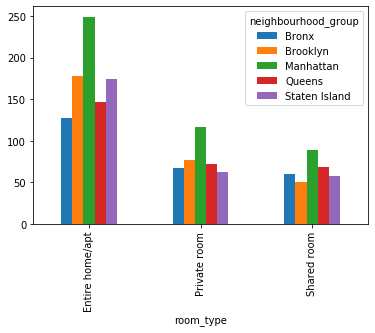

In [41]:
unstacked = airbnb_grouped["price"].mean().unstack()
unstacked.plot(kind="bar")
plt.show()

## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?